## 1) Demonstrate LangChain with a suitable example involving RAG, input/output parsing, output formatting, etc.

In [1]:
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.1/456.1 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.59.9
    Uninstalling openai-1.59.9:
      Successfully uninstalled openai-1.59.9


In [33]:
!pip install langchain -q
!pip install openai -q
!pip install langchain_community -q
!pip install faiss-cpu -q
!pip install rich -q

from getpass import getpass
import os
from rich.panel import Panel
from rich import print

# Set up OpenAI API key
os.environ["OPENAI_API_KEY"] = getpass()

import openai
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA
from langchain.vectorstores import FAISS
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.prompts import PromptTemplate
from langchain.schema import Document

# Set up the OpenAI chat model
openai_llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# Define the documents (RAG Knowledge Base)
documents = [
    "The Moon is the Earth's only natural satellite and has a significant impact on ocean tides.",
    "Saturn has a complex ring system made up of ice and rock particles.",
    "Jupiter is the largest planet in the solar system and has a Great Red Spot, which is a giant storm.",
    "Mars is known as the Red Planet due to the iron oxide present on its surface, giving it a reddish appearance.",
    "Venus has a thick atmosphere that traps heat, making it the hottest planet in the solar system."
]

#Convert raw text into LangChain Document format
langchain_docs = [Document(page_content=text) for text in documents]

# Create embeddings for the documents using SentenceTransformer (Vector Store for RAG)
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
vector_store = FAISS.from_documents(langchain_docs, embedding_model)

# Define a refined custom prompt template for generating responses
template = """
Use the most relevant context to answer the question in a detailed and informative manner. Your response should not only answer the question but provide additional relevant context to make the answer richer. Be sure to include extra details based on the context provided.

Context:
{context}

Question:
{question}

Answer:
"""
prompt = PromptTemplate(input_variables=["context", "question"], template=template)

# Create a Retrieval-based QA chain (RAG Pipeline)
qa_chain = RetrievalQA.from_chain_type(
    llm=openai_llm,
    retriever=vector_store.as_retriever(k=2),  # Retrieve top 2 most relevant documents
    return_source_documents=True,  # Ensures we get source documents
    chain_type_kwargs={"prompt": prompt}
)

# Query the model
query = "Why does Jupiter have the Great Red Spot?"
result = qa_chain({"query": query})  # Input Parsing: Converts query into required format

# Extract and format output (Output Parsing & Formatting)
answer = result["result"]

# Display the formatted output using rich Panel
panel = Panel.fit(
    f"[bold yellow]Question:[/bold yellow] {query}\n\n[bold green]Answer:[/bold green] {answer}",
    title="[bold magenta]The LangChain Output[/bold magenta]",
    border_style="bold magenta"
)
print(panel)

# Debugging: Show source documents (if available)
print("\n[bold cyan]Source Document(s):[/bold cyan]")
if "source_documents" in result:
    for doc in result["source_documents"]:
        print(f"• {doc.page_content}")
else:
    print("[bold red]No source documents found.[/bold red]")


··········


╭───────────────────────────────────────────── The LangChain Output ──────────────────────────────────────────────╮
│ Question: Why does Jupiter have the Great Red Spot?                                                             │
│                                                                                                                 │
│ Answer: The Great Red Spot on Jupiter is a massive storm that has been raging for centuries. It is believed to  │
│ be a high-pressure system that is rotating counterclockwise, creating a swirling vortex of gases. The reason    │
│ for its reddish color is still not fully understood, but it is thought to be caused by chemicals in Jupiter's   │
│ atmosphere reacting with sunlight. The storm's longevity can be attributed to the lack of landmasses or         │
│ obstacles on Jupiter's surface to disrupt its circulation, allowing it to persist for such a long time. The     │
│ Great Red Spot is a fascinating feature of Jupiter that continues to intrigue scientists and astronomers alike. │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Source Document(s):

• Jupiter is the largest planet in the solar system and has a Great Red Spot, which is a giant storm.

• Mars is known as the Red Planet due to the iron oxide present on its surface, giving it a reddish appearance.

• Venus has a thick atmosphere that traps heat, making it the hottest planet in the solar system.

• Saturn has a complex ring system made up of ice and rock particles.

##  2) (B) Classify CIFAR 10 images with a CNN model but study the effect on the performance by varying the following modeling aspects:

1) Batch Normalization and Dropout

2) Number of convolution and pooling layers

3) Activation function

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


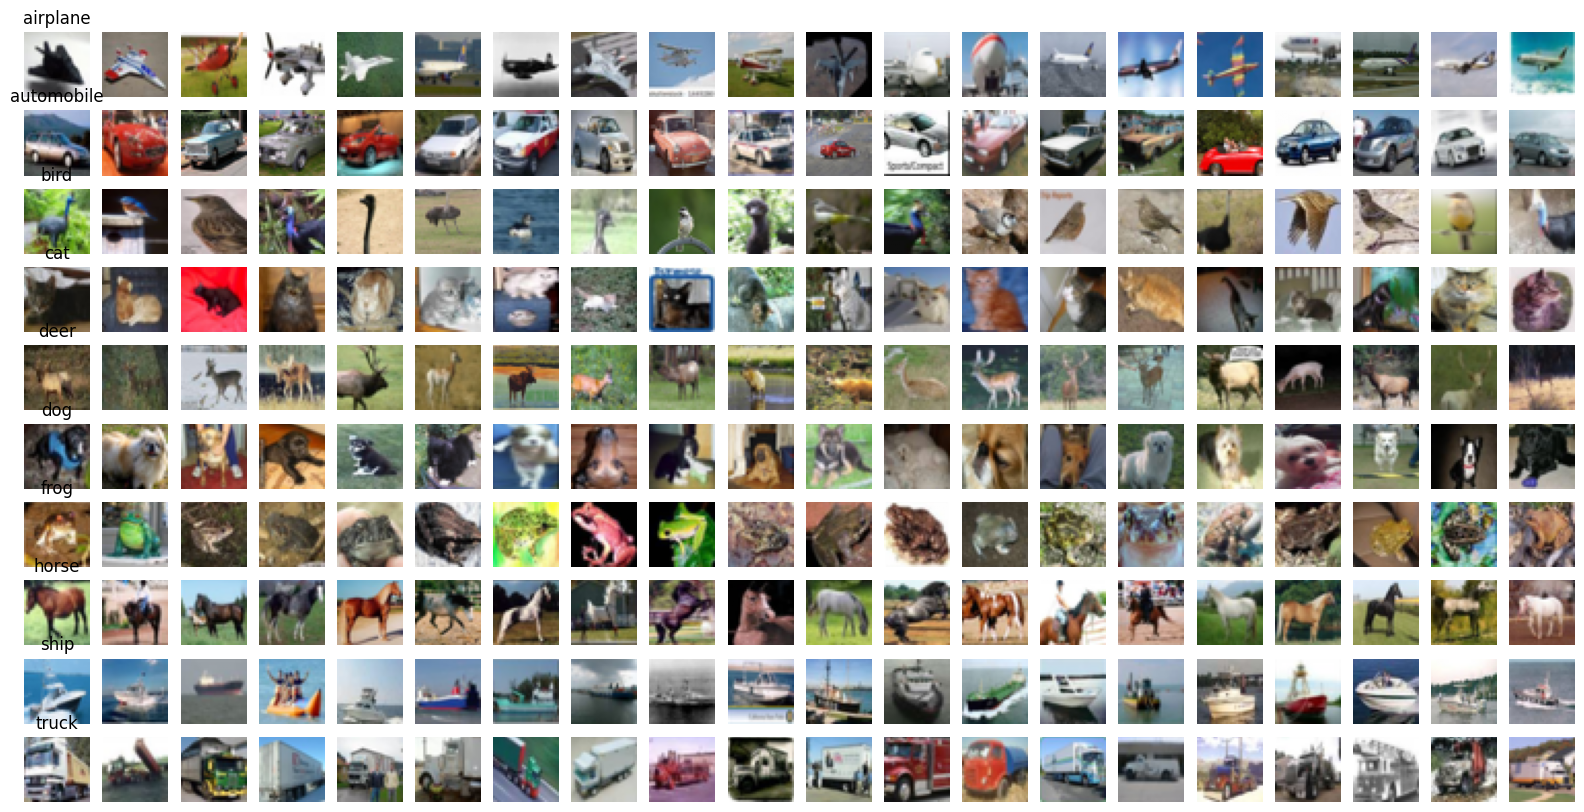

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 10))

for i in range(len(class_names)):
  # Use y_train instead of train_labels
  indices = np.where(y_train == i)[0][:20]

  for j, index in enumerate(indices):
    # Use x_train instead of train_images
    plt.subplot(10, 20, i * 20 + j + 1)
    plt.imshow(x_train[index])
    plt.axis('off')
    if j == 0:
      plt.title(class_names[i])

plt.show()

### defining plot graph based on accuracy and loss

In [6]:
def plot_graph(train_history):
  # Plot training & validation loss values
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(train_history.history['loss'], label='Training Loss')
  plt.plot(train_history.history['val_loss'], label='Validation Loss')
  plt.title('Model Loss ')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plot training & validation accuracy values
  plt.subplot(1, 2, 2)
  plt.plot(train_history.history['accuracy'], label='Training Accuracy')
  plt.plot(train_history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Model Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

### CNN Model

In [7]:

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.3518 - loss: 1.7470 - val_accuracy: 0.5397 - val_loss: 1.2570
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5768 - loss: 1.1923 - val_accuracy: 0.6305 - val_loss: 1.0542
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6395 - loss: 1.0228 - val_accuracy: 0.6571 - val_loss: 0.9813
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6796 - loss: 0.9125 - val_accuracy: 0.6837 - val_loss: 0.9188
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7069 - loss: 0.8356 - val_accuracy: 0.6825 - val_loss: 0.9345
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7283 - loss: 0.7754 - val_accuracy: 0.6944 - val_loss: 0.8914
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7486 - loss: 0.7138 - val_accuracy: 0.6986 - val_loss: 0.8916
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7613 - loss: 0.6

Test accuracy: 0.7017999887466431

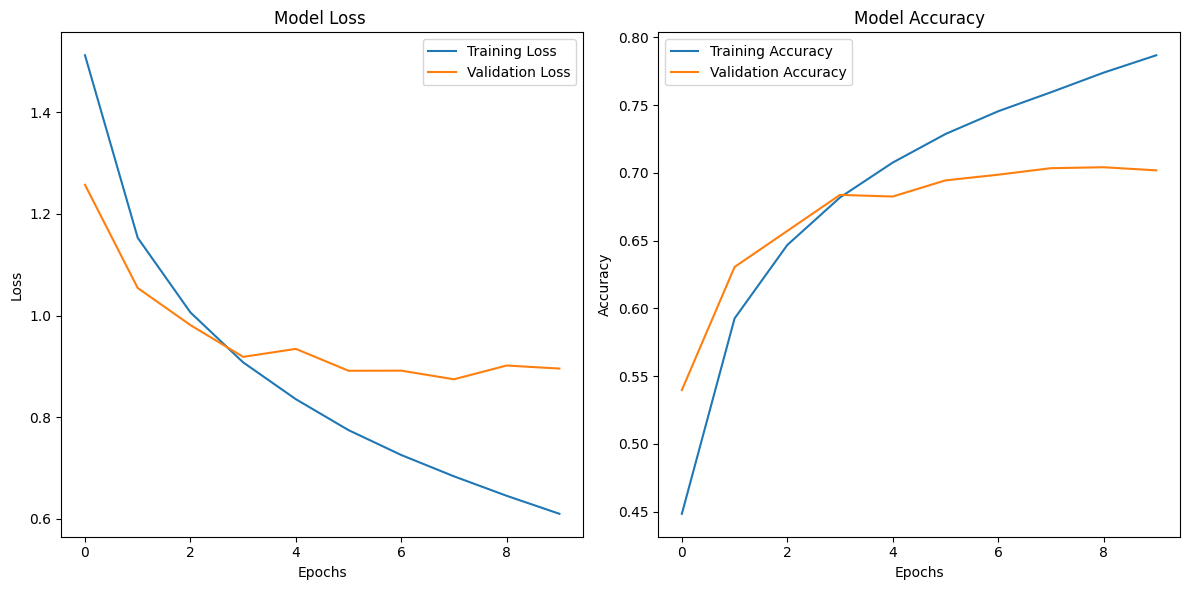

In [10]:

plot_graph(history)

### CNN with Batch Normalization

In [11]:
model_batchNormed = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10)  # 10 output classes for CIFAR-10

])

# Compile the model
model_batchNormed.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model_batchNormed.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,466 (482.29 KB)

 Trainable params: 123,018 (480.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
# Train the model
history_model_batchNormed = model_batchNormed.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_batchNormed.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.4650 - loss: 1.5216 - val_accuracy: 0.4905 - val_loss: 1.6778
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6648 - loss: 0.9699 - val_accuracy: 0.6257 - val_loss: 1.0667
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7114 - loss: 0.8272 - val_accuracy: 0.6676 - val_loss: 0.9464
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7513 - loss: 0.7146 - val_accuracy: 0.6462 - val_loss: 1.0373
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7733 - loss: 0.6509 - val_accuracy: 0.6962 - val_loss: 0.8992
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8001 - loss: 0.5761 - val_accuracy: 0.7296 - val_loss: 0.7948
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8185 - loss: 0.5171 - val_accuracy: 0.7221 - val_loss: 0.8353
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8391 - loss: 0.463

Test accuracy: 0.7197999954223633

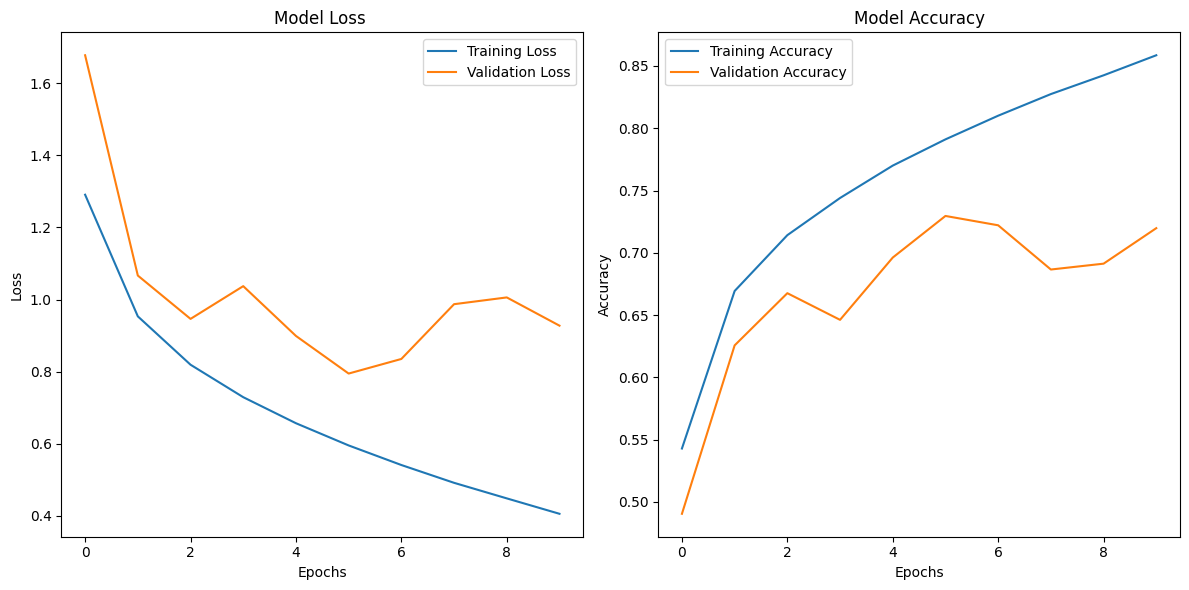

In [14]:
plot_graph(history_model_batchNormed)

### CNN with Batch Normalization and Dropout

In [15]:
model_dropout = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Add dropout with a 50% dropout rate
    layers.Dense(10)  # 10 output classes for CIFAR-10
])

# Compile the model
model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model_dropout.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,466 (482.29 KB)

 Trainable params: 123,018 (480.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
# Train the model
history_model_dropout = model_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_dropout.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3682 - loss: 1.9368 - val_accuracy: 0.4850 - val_loss: 1.4506
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5909 - loss: 1.1667 - val_accuracy: 0.6260 - val_loss: 1.0638
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6560 - loss: 0.9913 - val_accuracy: 0.6663 - val_loss: 0.9766
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6913 - loss: 0.8953 - val_accuracy: 0.6465 - val_loss: 1.0009
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7186 - loss: 0.8231 - val_accuracy: 0.6898 - val_loss: 0.8944
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7402 - loss: 0.7613 - val_accuracy: 0.6887 - val_loss: 0.8985
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7540 - loss: 0.7173 - val_accuracy: 0.6681 - val_loss: 0.9805
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7735 - loss: 0.67

Test accuracy: 0.73089998960495

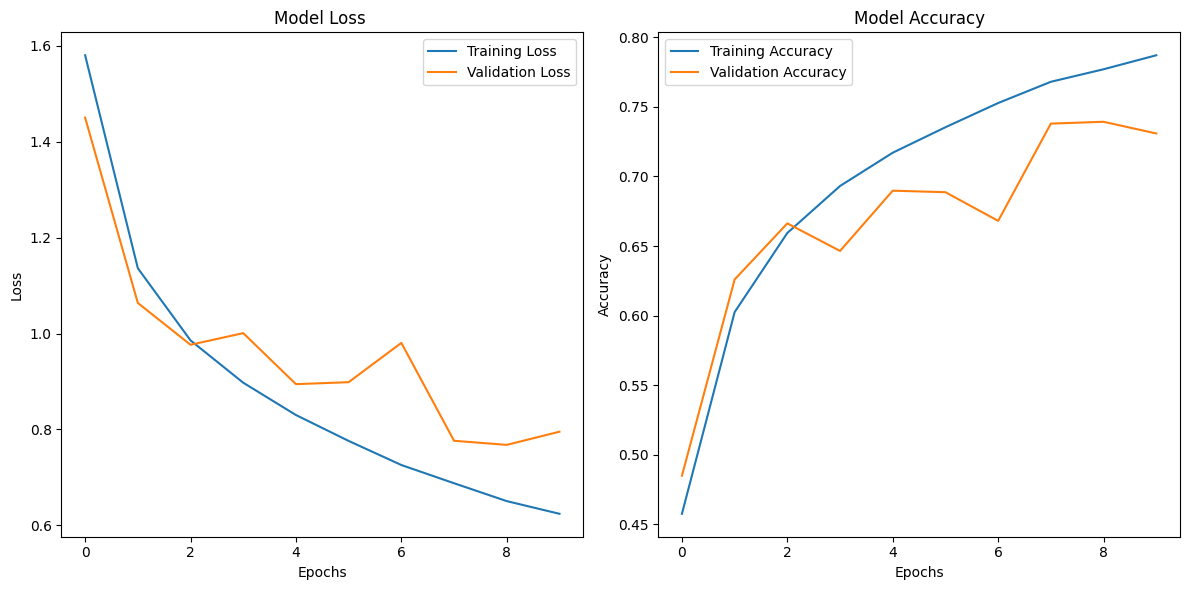

In [18]:
plot_graph(history_model_dropout)

### Changing count of convolution and pooling layer.

In [58]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

# Define the CNN model with Batch Normalization and Dropout
model_deep = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
     # Padding to maintain size
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (1, 1), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (1, 1), activation='relu', padding='same'),

    layers.Conv2D(1024, (1, 1), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile the model
model_deep.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




In [59]:
model_deep.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_139 (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_93               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_140 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_141 (Conv2D)                  │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_142 (Conv2D)                  │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_143 (Conv2D)                  │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_144 (Conv2D)                  │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_145 (Conv2D)                  │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_96               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_146 (Conv2D)                  │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_147 (Conv2D)                  │ (None, 4, 4, 512)           │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_97               │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_148 (Conv2D)                  │ (None, 4, 4, 512)           │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_149 (Conv2D)                  │ (None, 4, 4, 1024)          │         525,3

 Total params: 4,198,954 (16.02 MB)

 Trainable params: 4,194,666 (16.00 MB)

 Non-trainable params: 4,288 (16.75 KB)

In [60]:
# Fit the model
history_model_deep = model_deep.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_deep.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.3757 - loss: 1.8964 - val_accuracy: 0.5634 - val_loss: 1.2345
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.6483 - loss: 1.0035 - val_accuracy: 0.6703 - val_loss: 0.9397
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7225 - loss: 0.8099 - val_accuracy: 0.7195 - val_loss: 0.7961
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7664 - loss: 0.6902 - val_accuracy: 0.7481 - val_loss: 0.7606
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7963 - loss: 0.6052 - val_accuracy: 0.7870 - val_loss: 0.6235
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8241 - loss: 0.5217 - val_accuracy: 0.7299 - val_loss: 0.8085
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8546 - loss: 0.4358 - val_accuracy: 0.6865 - val_loss: 1.0986
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8770 -

Test accuracy: 0.8101999759674072

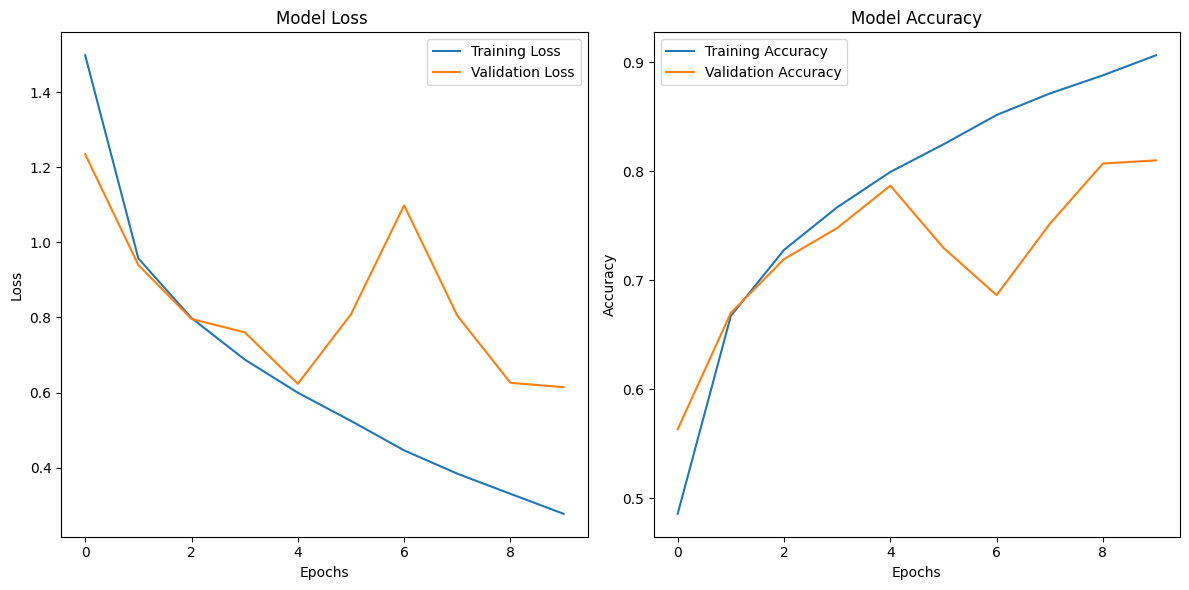

In [61]:
plot_graph(history_model_deep)

### Changing Activation functions

In [64]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

# Define the CNN model with Batch Normalization and Dropout
model_activation = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (1, 1), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (1, 1), activation='relu', padding='same'),

    layers.Conv2D(1024, (1, 1), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_activation.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Use from_logits=False since Softmax is applied
              metrics=['accuracy'])

In [65]:

# Train the model
history_model_acitvation = model_activation.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model_activation.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.3738 - loss: 1.9290 - val_accuracy: 0.6072 - val_loss: 1.1634
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6550 - loss: 1.0028 - val_accuracy: 0.6328 - val_loss: 1.0818
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7142 - loss: 0.8321 - val_accuracy: 0.7106 - val_loss: 0.8376
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7650 - loss: 0.7063 - val_accuracy: 0.7524 - val_loss: 0.7255
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7958 - loss: 0.6033 - val_accuracy: 0.7386 - val_loss: 0.7681
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8259 - loss: 0.5219 - val_accuracy: 0.7727 - val_loss: 0.6948
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8502 - loss: 0.4497 - val_accuracy: 0.7663 - val_loss: 0.7632
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8739 -

Test accuracy: 0.7853999733924866

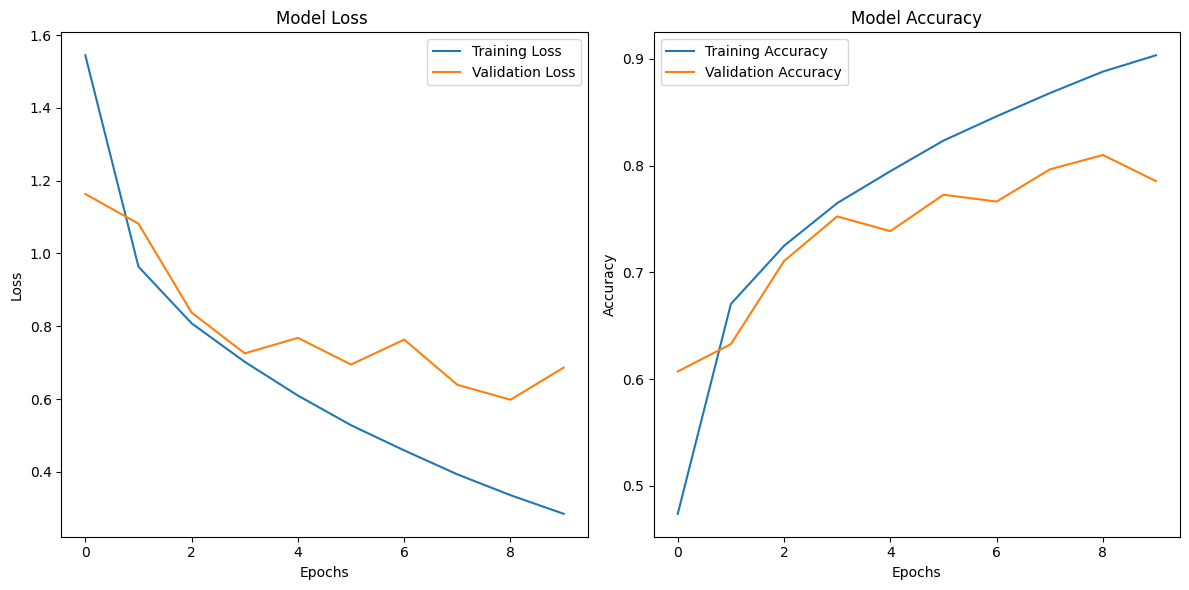

In [66]:
plot_graph(history_model_acitvation)

### Best Model Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


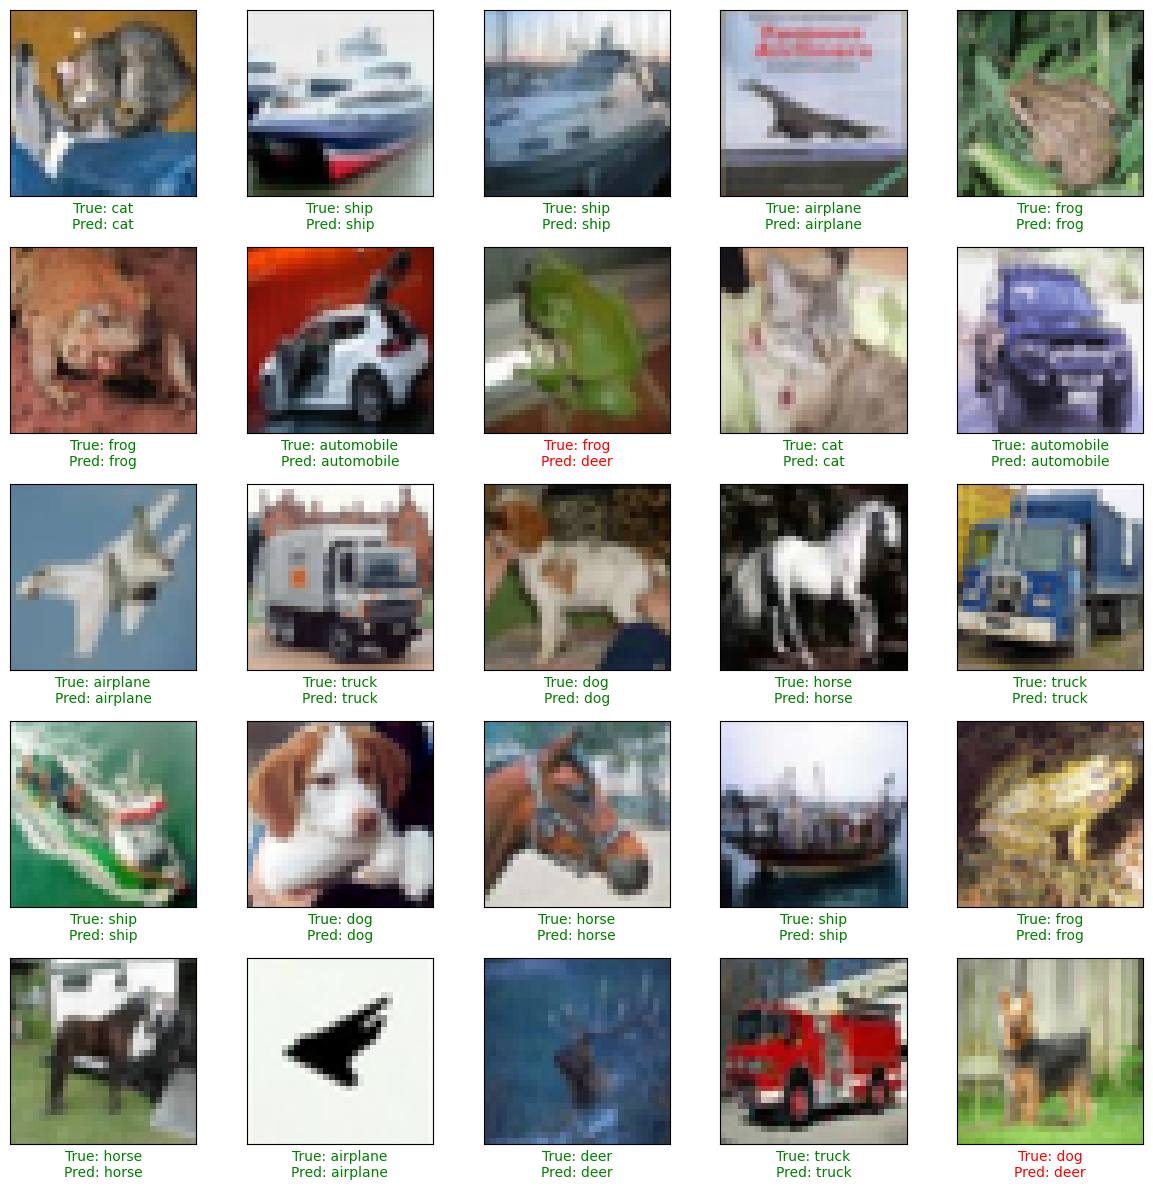

In [67]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model_deep.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test.flatten()

x_test_rescaled = (x_test * 255).astype(np.uint8) if x_test.max() <= 1 else x_test


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_predictions(images, true_labels, predicted_labels, class_names, num_rows=5, num_cols=5):
    plt.figure(figsize=(12, 12))

    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap="gray")
        plt.xticks([])
        plt.yticks([])
        color = "green" if predicted_labels[i] == true_labels[i] else "red"
        plt.xlabel(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}", color=color)

    plt.tight_layout()
    plt.show()

# Displaying 25 images with predictions
plot_predictions(x_test_rescaled[:25], true_labels[:25], predicted_labels[:25], class_names)


### Results

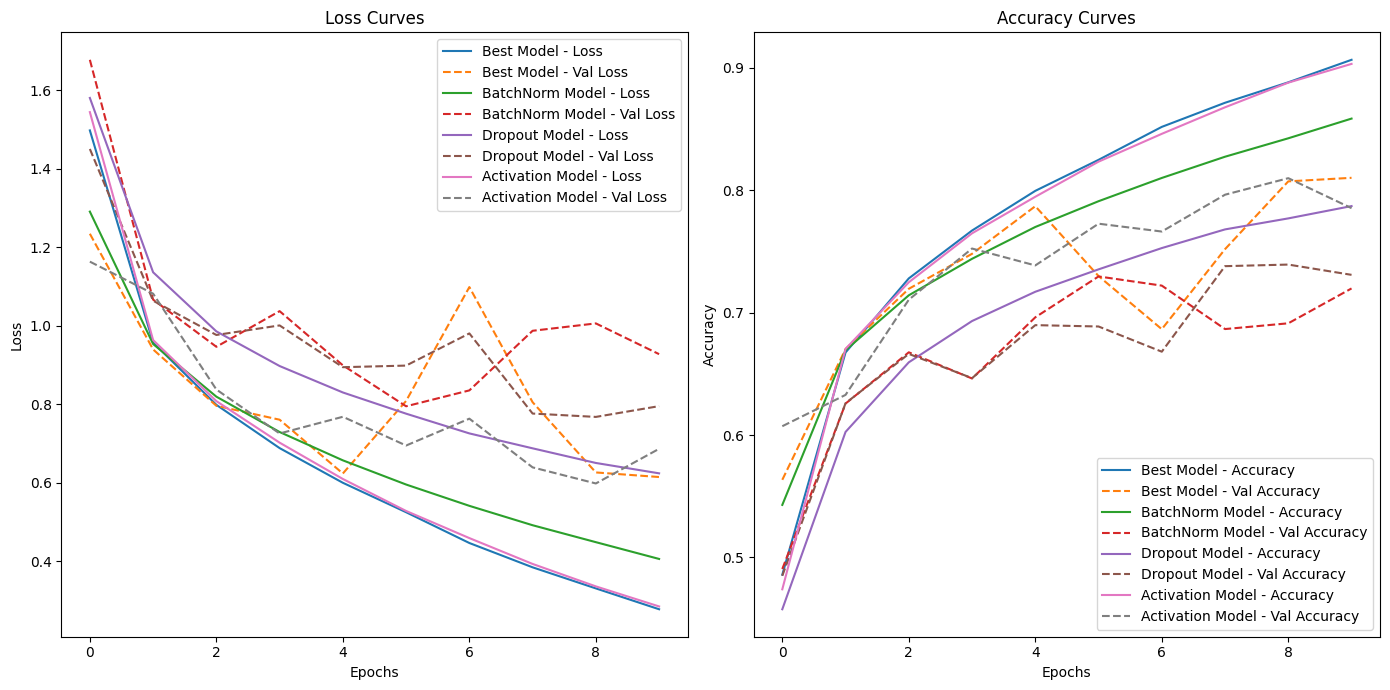

In [68]:
#plotting all plots in one grpah
import matplotlib.pyplot as plt

_, test_acc_original = model_deep.evaluate(x_test, y_test, verbose=0)  # Best Model
_, test_acc_batchNormed = model_batchNormed.evaluate(x_test, y_test, verbose=0)  # BatchNorm Model
_, test_acc_dropout = model_dropout.evaluate(x_test, y_test, verbose=0)  # Dropout Model
_, test_acc_activation = model_activation.evaluate(x_test, y_test, verbose=0)  # Activation Model

accuracies = {
    'Best Model': test_acc_original,
    'BatchNorm Model': test_acc_batchNormed,
    'Dropout Model': test_acc_dropout,
    'Activation Model': test_acc_activation
}

def plot_all_graphs(model_histories):

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    for model_name, history in model_histories.items():
        plt.plot(history.history['loss'], label=f'{model_name} - Loss')
        plt.plot(history.history['val_loss'], label=f'{model_name} - Val Loss', linestyle='--')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    for model_name, history in model_histories.items():
        plt.plot(history.history['accuracy'], label=f'{model_name} - Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} - Val Accuracy', linestyle='--')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
model_histories = {
    'Best Model': history_model_deep,
    'BatchNorm Model': history_model_batchNormed,
    'Dropout Model': history_model_dropout,
    'Activation Model': history_model_acitvation
}
plot_all_graphs(model_histories)
